# Ejercicio de regresión logística

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/kaleko/CourseraML/master/ex2/data/ex2data1.txt', header=None, names=['exam_1', 'exam_2','Admitted'])
data.head()

,exam_1,exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


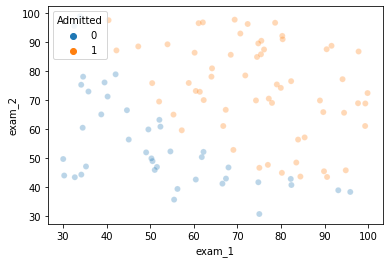

In [ ]:
sns.scatterplot(x='exam_1', y='exam_2', hue='Admitted', alpha =0.3, data=data)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

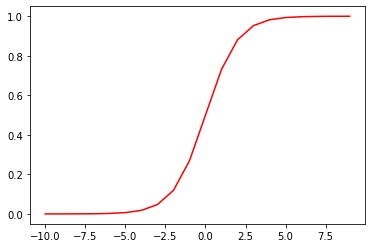

In [ ]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nums, sigmoid(nums), 'r')

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
X = data[['exam_1', 'exam_2']]
y = data[['Admitted']]
logmodel.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Persona con buenas notas
X_new = pd.DataFrame({'exam_1': [80], 
                      'exam_2': [80]})
preds = logmodel.predict_proba(X_new)
preds[:,1]

array([0.99940295])

In [ ]:
print(logmodel.intercept_)
print(logmodel.coef_)

[-25.05219314]
[[0.20535491 0.2005838 ]]


In [ ]:
#
X_new_2 = pd.DataFrame({'exam_1': [60], 
                      'exam_2': [60]})
preds_2 = logmodel.predict_proba(X_new_2)
preds_2[:,1]

array([0.3327285])

In [ ]:
# Nueva columna
data['type'] = 'train'

#
obs_1 = pd.DataFrame({'exam_1': [80], 'exam_2': [80], 'Admitted': preds[:,1], 'type': "test"})
obs_2 = pd.DataFrame({'exam_1': [60], 'exam_2': [60], 'Admitted': preds_2[:,1], 'type': "test"})

# 
print(obs_1)
print(obs_2)

   exam_1  exam_2  Admitted  type
0      80      80  0.999403  test
   exam_1  exam_2  Admitted  type
0      60      60  0.332728  test


In [ ]:
data_total = pd.concat([data,obs_1, obs_2])

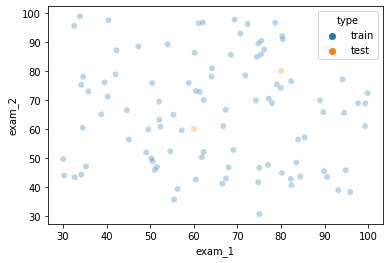

In [ ]:
# first, plot the observed data
sns.scatterplot(x='exam_1', y='exam_2', hue='type', alpha =0.3, data=data_total)

In [ ]:
data_total

,exam_1,exam_2,Admitted,type
0,34.623660,78.024693,0.000000,train
1,30.286711,43.894998,0.000000,train
2,35.847409,72.902198,0.000000,train
3,60.182599,86.308552,1.000000,train
4,79.032736,75.344376,1.000000,train
...,...,...,...,...
97,99.315009,68.775409,1.000000,train
98,55.340018,64.931938,1.000000,train
99,74.775893,89.529813,1.000000,train
0,80.000000,80.000000,0.999403,test


In [ ]:
print(logmodel.intercept_)
print(logmodel.coef_)

[-25.05219314]
[[0.20535491 0.2005838 ]]


In [ ]:
b_0 = logmodel.intercept_
b_1 = logmodel.coef_[0][0]
b_2 = logmodel.coef_[0][1]
print(b_0, b_1, b_2)

[-25.05219314] 0.2053549121857799 0.20058380395530157


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Estudiante 1
print(1/(1+np.exp(-(b_0 + b_1 *80 + b_2*80))))
# Estudiante 2
print(1/(1+np.exp(-(b_0 + b_1 *60 + b_2*60))))

[0.99940295]
[0.3327285]


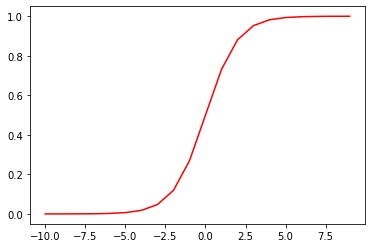

In [ ]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nums, sigmoid(nums), 'r')

# Primer Algoritmo de clasifación

En este notebook trataremos

1.   Carga y manipulación de datos
2.   Visualización (sencilla)
3. Entrenamiento del algoritmo

Esto se hará para

* Clasificación: variable discreta



In [ ]:
# Importamos las diferentes librerías
## Nombre de la librería y alias que le ponemos en nuestro notebook
## Los alias con las que las importamos suelen ser muy estandares

# Importar y manipular datos
import pandas as pd

# Graficar datos
import seaborn as sns
import matplotlib.pyplot as plt

# Algebra 
import numpy as np


In [ ]:
print(pd.__version__)
print(sns.__version__)

1.3.5
0.11.2


# Churn & Telco
[Dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383)

## Carga de datos

Importaremos el dataset de sobre el que trabajaremos

In [ ]:
# Cargamos 
df = pd.read_csv('https://raw.githubusercontent.com/carlosbort/datasets/master/bank_churn/telecom_churn.csv')
df.head() # Cogemos las primeras 5 filas

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Hemos creado el primer objeto **df**, que es una matriz con datos. Esta matriz contiene los datos y contiene: 

1. **Clase**: plantilla genérica (molde o reglas) de cómo es ese objeto. 
2. **Atributos**: son los diferentes características que puede tener un objeto. Para nuestro caso será, el **tamaño**, el nombre de las columnas. *Van sin paréntesis*
3. **Métodos**: Son las acciones que podremos utilizar sobre nuestros objetos. Calcular medias, sumas, conteos, etc. *Van con paréntesis*





In [ ]:
# Ejemplo dinámico de Google Colab
df.shape

(3333, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## Manipulación del dataset
Tenemos creado el objeto df en memoria y podemos crear diferentes 

In [ ]:
df.describe() # Descriptivo de todas las variables numéricas

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Devuelve 1 columna
df["State"].head()

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: State, dtype: object

In [ ]:
# Devuelve las primeras dos observaciones
df[0:2]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [ ]:
print(df.shape)
print(df.columns)

(3333, 20)
Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')



**Creación de columnas**, para empezar a modelar

In [ ]:
df['Churn_num'] = df['Churn'].astype('int64')

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Churn_num
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0


**Eliminar** una variable

In [ ]:
df = df.drop(columns="Churn")
df.head()
# df.drop("Churn", axis=1, inplace=True). 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn_num
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Cambiar nombre** a una variable

In [ ]:
df.rename(columns={"Churn_num": "Churn"}, inplace=True)
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


**Cálculo** sobre una columna

In [ ]:
print(df['Churn'].value_counts())
df['Churn'].value_counts(normalize=True)

0    2850
1     483
Name: Churn, dtype: int64


0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [ ]:
df['Churn'].mean()

0.14491449144914492

**Filtar** por condición

In [ ]:
df[df['State'] == 'CO']

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
56,CO,141,415,No,No,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1,0
57,CO,121,408,No,Yes,30,198.4,129,33.73,75.3,77,6.40,181.2,77,8.15,5.8,3,1.57,3,1
82,CO,55,408,No,Yes,25,165.6,123,28.15,136.1,95,11.57,175.7,90,7.91,11.0,2,2.97,3,0
108,CO,141,415,No,Yes,32,148.6,91,25.26,131.1,97,11.14,219.4,142,9.87,10.1,1,2.73,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,CO,103,415,No,Yes,37,153.5,78,26.10,241.9,108,20.56,244.7,110,11.01,10.6,3,2.86,1,0
3021,CO,57,415,No,No,0,85.9,92,14.60,193.9,127,16.48,231.5,93,10.42,10.1,2,2.73,0,0
3064,CO,130,408,No,No,0,271.8,129,46.21,237.2,128,20.16,210.1,91,9.45,8.7,2,2.35,4,1
3075,CO,181,510,No,Yes,40,105.2,61,17.88,341.3,79,29.01,165.7,97,7.46,6.3,3,1.70,2,0


In [ ]:
(df['Churn'] == 1).head()

0    False
1    False
2    False
3    False
4    False
Name: Churn, dtype: bool

In [ ]:
len(df[df['Churn'] == 1])

483

**Filtro más operación**

In [ ]:
df[df['Churn'] == 1].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [ ]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

**Agrupación**: agrupar por diferentes condiciones.

In [ ]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [ ]:
df.groupby(['Churn'])['Total day charge','Total eve charge', 'Total night charge'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total day charge,Total eve charge,Total night charge
Churn,,,
0,29.780421,16.918909,9.006074
1,35.175921,18.054969,9.235528


In [ ]:
df.groupby(['Churn'])['Total day charge','Total eve charge', 'Total night charge'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total day charge,Total eve charge,Total night charge
Churn,,,
0,29.780421,16.918909,9.006074
1,35.175921,18.054969,9.235528


**Visualización**

Aquí utilizaremos diferentes plots de la libreria `seaborn` que está importada como `sns`.
Como siempre hay un [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf), principales gráficos:


* Scatterplot
* Bar Chart
* Count Plot
* Point Plot
* Boxplot
* Violinplot



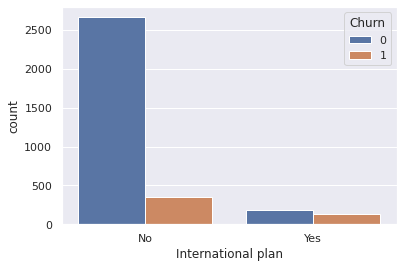

In [ ]:
sns.set()
sns.countplot(x='International plan', hue='Churn', data=df);

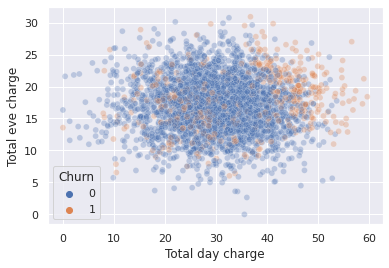

In [ ]:
sns.scatterplot(x='Total day charge', y='Total eve charge', hue='Churn', alpha =0.3, data=df)

## Ejercicio: Manipulación / Visualización

[Pandas CheatSheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

[Seaborn CheatSheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

**Manipulación de datos**

0. Utiliza el atributo `columns`
1.   Utiliza la función `isnull()` a la columna `State`. Aplica la función `sum()` a posteriori
2.   **Crea una columna** que sea la multiplicación de `Total day charge` y `Total eve charge`, llámala `prod_day_eve`
3. De la columna **State**, utiliza la función `value_counts` para ver los atributos con su número con opción `normalize=True` y sin
4. Calcula la media de todas las variables por aquellos usuarios que `Churn=0` (filtro + operación)

**Visualización**

1.   Utiliza un `countplot` para ver si hay diferencias en el churn de los que tienen `Voice Plan`
2.   Utiliza un `barplot` donde x es el estado, y es `total day charge`, filtra en df por el estado `KS`

**Avanzados**

1. Utiliza un `apply` en el dataframe con la función `max` de la libreria numpy
2. Utiliza el método `corr()` para crear una matriz de correlaciones llamada `df_corr`. Utiliza la libreria seaborn para poder graficarla `heatmap`. Si te sobre tiempo piensa en cómo hacer visualmente atractiva



In [ ]:
# Manipulación de datos
## Utiliza el atributo columns

## Utiliza la función isnull() a la columna State. Aplica la función sum() a posteriori

## Crea una columna que sea la multiplicación de Total day charge y Total eve charge, llámala prod_day_eve

## De la columna State, utiliza la función value_counts para ver los atributos con su número con opción normalize=True y sin

## Calcula la media de todas las variables por aquellos usuarios que Churn=0 (filtro + operación)


In [ ]:
# Visualización
## Utiliza un countplot para ver si hay diferencias en el churn de los que tienen Voice Plan

## Utiliza un barplot donde x es el estado, y es total day charge, filtra en df por el estado KS


In [ ]:
# Avanzados
## Utiliza un apply en el dataframe con la función max de la libreria numpy

## Utiliza el método corr() para crear una matriz de correlaciones llamada df_corr. Utiliza la libreria seaborn para poder graficarla heatmap. Si te sobre tiempo piensa en cómo hacer visualmente atractiva


## First ML Model: Logistic Regression

In [ ]:
# Cargamos 
df = pd.read_csv('https://raw.githubusercontent.com/carlosbort/datasets/master/bank_churn/telecom_churn.csv')
df.head() # Cogemos las primeras 5 filas

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

¿Que pasa con las Variables categóricas? [Get dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [ ]:
vmp = pd.get_dummies(df['Voice mail plan'],drop_first=True,prefix="voice")   # 
ip = pd.get_dummies(df['International plan'],drop_first=True,prefix="ip")

In [ ]:
pd.get_dummies(df['State'],drop_first=False).head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Quitamos columna State
df.drop('State',axis=1,inplace=True)

In [ ]:
df.drop(['Voice mail plan','International plan'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip],axis=1)
df.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,voice_Yes,ip_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1


### Matriz de entrenamiento
Aquí ya tendríamos lista nuestra matriz de entrenamiento, para ello cargaremos las diferentes librerías necesarias para entrenar un primer algoritmo.

### Separamos train y test

In [ ]:
import random
random.seed(113)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1), 
                                                    df['Churn'], test_size=0.25, 
                                                    random_state=101)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2499, 18)
(2499,)
(834, 18)
(834,)


### Entrenamos y predecimos

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

Predecimos en test

Evaluamos las predicciones

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
predictions[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
dif = abs(predictions - y_test)
sum_dif = sum(dif)
error_rate = sum_dif / len(dif)
accuracy = 1 - error_rate
accuracy

0.8717026378896883

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       729
           1       0.43      0.06      0.10       105

    accuracy                           0.87       834
   macro avg       0.65      0.52      0.52       834
weighted avg       0.82      0.87      0.83       834



Utilizaremos `predict_proba`:

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
roc_auc

0.741158795479783

In [ ]:
logmodel.predict_proba(X_test)[:,1][1:20]

array([0.05069226, 0.20946479, 0.22230436, 0.26802389, 0.02868212,
       0.2185629 , 0.09511112, 0.034076  , 0.06871527, 0.14755293,
       0.07873878, 0.24286028, 0.40361773, 0.13909312, 0.09510632,
       0.41623688, 0.09692202, 0.0181478 , 0.1957852 ])

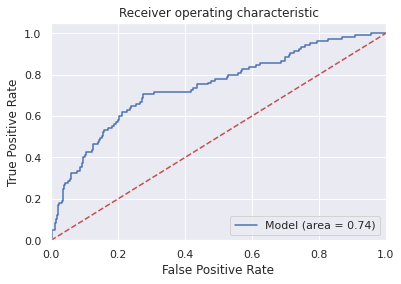

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
prob_pred = pd.DataFrame({'probs':logmodel.predict_proba(X_test)[:,1]})
df_ytest = pd.DataFrame(y_test)

In [ ]:
prob_pred.reset_index(drop=True, inplace=True)
df_ytest.reset_index(drop=True, inplace=True)
test_probs = pd.concat([prob_pred,df_ytest],axis=1)
test_probs.head()

,probs,Churn
0,0.171352,0
1,0.050692,0
2,0.209465,0
3,0.222304,0
4,0.268024,0


### Ejercicio Modelo

**Visualización**
- Seguido del distribution plot, ¿podrías hacer un `sns`boxplot donde x sea el churn y y la probabilidad?


**Modelado**
¿Podrías intentar mejorar el modelo actual creando nuevas variables?
- ¿Que equipo tendrá mejor AUC?


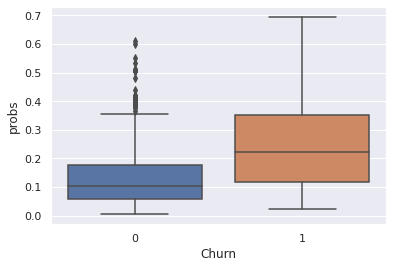

In [ ]:
# Visualización
## Seguido del distribution plot, ¿podrías hacer un `sns`boxplot donde x sea el churn y y la probabilidad?




Para el siguiente apartado podemos realizar nuevas visualizaciones

In [ ]:
#Modelado 
## ¿Podrías intentar mejorar el modelo actual creando nuevas variables?
## ¿Que equipo tendrá mejor AUC?

# Cargamos 
df = pd.read_csv('https://raw.githubusercontent.com/carlosbort/datasets/master/bank_churn/telecom_churn.csv')

# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

# Creamos variables dummies
vmp = pd.get_dummies(df['Voice mail plan'],drop_first=True,prefix="voice")   # 
ip = pd.get_dummies(df['International plan'],drop_first=True,prefix="ip")

# Quitamos columna State. 
# TO DO: ¿Alguna idea para ahora?
state_dum = pd.get_dummies(df['State'],drop_first=True,prefix="s_")
df.drop('State',axis=1,inplace=True)

# Quitamos columnas voice mail e International plan
df.drop(['Voice mail plan','International plan'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip,state_dum],axis=1)

# TO DO: ¿Podemos crear más variables?


# Separamos train y test
import random
random.seed(113)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1), 
                                                    df['Churn'], test_size=0.25, 
                                                    random_state=101)

# Importamos el modelo y entrenamos
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

# Predecimos
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
print('Team AUC:', roc_auc)


Team AUC: 0.7427526291723823


In [ ]:
state_dum

,s__AL,s__AR,s__AZ,s__CA,s__CO,s__CT,s__DC,s__DE,s__FL,s__GA,s__HI,s__IA,s__ID,s__IL,s__IN,s__KS,s__KY,s__LA,s__MA,s__MD,s__ME,s__MI,s__MN,s__MO,s__MS,s__MT,s__NC,s__ND,s__NE,s__NH,s__NJ,s__NM,s__NV,s__NY,s__OH,s__OK,s__OR,s__PA,s__RI,s__SC,s__SD,s__TN,s__TX,s__UT,s__VA,s__VT,s__WA,s__WI,s__WV,s__WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3330,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3331,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
## EJERCICIOS



# Extraer los coeficientes de la regresión logística ajustada
[...]

## Interpretar los coeficientes
coef_dict = {}
for coef, feat in zip(logmodel.coef_[0][1:len(df.drop('Churn',axis=1).columns)],df.drop('Churn',axis=1).columns):
    coef_dict[feat] = coef
coef_dict
## Hacer una predicción para una nueva observacion

## Que harías para que el valor de la predicción sea lo más cercano a 1?



{'Account length': -0.007347061493806127,
 'Area code': -0.025934524204706867,
 'Customer service calls': -0.016122427306354135,
 'Number vmail messages': 0.009978673376642133,
 'Total day calls': 0.001766711805809388,
 'Total day charge': 0.003058870160575243,
 'Total day minutes': -0.0009781293711775341,
 'Total eve calls': 0.00025926306219199946,
 'Total eve charge': 0.0005826288867926294,
 'Total eve minutes': -0.005845651970083279,
 'Total intl calls': 0.008356547584224307,
 'Total intl charge': 0.415509055144189,
 'Total intl minutes': -0.14893142134636925,
 'Total night calls': 6.0393783774007924e-05,
 'Total night charge': 0.03114178574208234,
 'Total night minutes': -0.006229648113624325,
 'ip_Yes': -0.008137038730002433,
 's__AL': 0.0008971899618028488,
 's__AR': -0.005419269241051042,
 's__AZ': 0.0031056286478164945,
 's__CA': -0.004778382648289414,
 's__CO': 0.0006631445472064058,
 's__CT': -0.0026775594981844624,
 's__DC': 0.002433188272121192,
 's__DE': 0.0016476013488764

Ajusta el modelo con Statsmodels e interpreta el resultado

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
